In [2]:
from pathlib import Path
from saffron.io import data_io
from saffron.data import datasets, data_processing
from saffron.models import torch_models
import matplotlib.pyplot as plt

import torch

In [3]:
microglia_im_path = "/Volumes/imagereg/Cross_Species_Study/human/denoised"

In [4]:
images = data_io.load_images_from_directory(microglia_im_path)

INFO:saffron.io.data_io:Successfully loaded 61 images from /Volumes/imagereg/Cross_Species_Study/human/denoised


In [5]:
ims = data_io.ImageDataset(image_data_list = images)

In [6]:
ims[0]

ImageData(data=array([[[[ 0,  2,  0],
         [ 0,  2,  0],
         [ 0,  3,  0],
         ...,
         [ 0, 19,  0],
         [ 0, 13,  0],
         [ 0,  3,  0]],

        [[ 0,  3,  0],
         [ 0,  3,  0],
         [ 0,  3,  0],
         ...,
         [ 0,  2,  0],
         [ 0,  2,  0],
         [ 0,  2,  0]],

        [[ 0,  3,  0],
         [ 0,  3,  0],
         [ 0,  3,  0],
         ...,
         [ 0,  1,  0],
         [ 0,  1,  0],
         [ 0,  1,  0]],

        ...,

        [[ 0,  2,  0],
         [ 0,  2,  0],
         [ 0,  2,  0],
         ...,
         [ 0,  1,  0],
         [ 0,  1,  0],
         [ 0,  1,  0]],

        [[ 0,  2,  0],
         [ 0,  1,  0],
         [ 0,  1,  0],
         ...,
         [ 0,  1,  0],
         [ 0,  1,  0],
         [ 0,  1,  0]],

        [[ 0,  1,  0],
         [ 0,  1,  0],
         [ 0,  1,  0],
         ...,
         [ 0,  2,  0],
         [ 0,  1,  0],
         [ 0,  1,  0]]],


       [[[ 0,  3,  0],
         [ 0,  3,  0],

In [7]:
ims.extract_single_channel(channel=1)
ims[0]

ImageData(data=array([[[ 2,  2,  3, ..., 19, 13,  3],
        [ 3,  3,  3, ...,  2,  2,  2],
        [ 3,  3,  3, ...,  1,  1,  1],
        ...,
        [ 2,  2,  2, ...,  1,  1,  1],
        [ 2,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  2,  1,  1]],

       [[ 3,  3,  3, ..., 21, 11,  2],
        [ 3,  3,  3, ...,  2,  1,  1],
        [ 3,  3,  3, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]],

       [[ 2,  2,  2, ...,  2,  2,  1],
        [ 2,  2,  2, ...,  2,  2,  1],
        [ 2,  2,  2, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  2, ...,  1,  1,  1],
        [ 1,  1,  2, ...,  1,  1,  1]],

       ...,

       [[ 8,  9,  9, ...,  3,  3,  2],
        [ 8,  8,  8, ...,  3,  3,  2],
        [ 8,  8,  8, ...,  3,  3,  2],
        ...,
        [ 2,  2,  2, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  1,  1,  1],
        [ 2,  2, 

In [8]:
ims.apply_max_projection()
ims[0]

ImageData(data=array([[ 8,  9,  9, ..., 21, 13,  3],
       [ 8,  8,  8, ...,  3,  3,  3],
       [ 9,  9,  8, ...,  3,  3,  3],
       ...,
       [ 3,  3,  4, ...,  3,  3,  3],
       [ 3,  3,  3, ...,  3,  3,  3],
       [ 3,  3,  3, ...,  6,  3,  3]], shape=(512, 512), dtype=uint8), file_path='/Volumes/imagereg/Cross_Species_Study/human/denoised/UWA-7029_A1_60X_cortex_Image1_-_Denoised_RGB_Alexa_488_antibody.tif', shape=(512, 512), dtype='uint8', metadata={'ImageWidth': 512, 'ImageLength': 512, 'BitsPerSample': (8, 8, 8), 'Compression': <COMPRESSION.NONE: 1>, 'PhotometricInterpretation': <PHOTOMETRIC.RGB: 2>, 'FillOrder': <FILLORDER.MSB2LSB: 1>, 'StripOffsets': (8, 7688, 15368, 23048, 30728, 38408, 46088, 53768, 61448, 69128, 76808, 84488, 92168, 99848, 107528, 115208, 122888, 130568, 138248, 145928, 153608, 161288, 168968, 176648, 184328, 192008, 199688, 207368, 215048, 222728, 230408, 238088, 245768, 253448, 261128, 268808, 276488, 284168, 291848, 299528, 307208, 314888, 322568, 

In [33]:
masked_im = data_processing.create_masked_image(ims[0].data, patch_position=(0, 0), patch_size=256)

In [34]:
patch_from_im = data_processing.extract_patch(ims[0].data, patch_position=(0,0), patch_size=256)

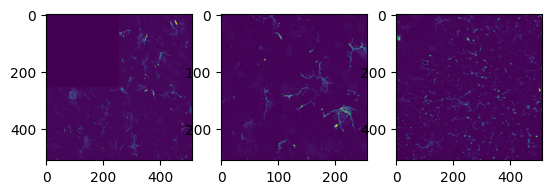

In [35]:
ax, fig = plt.subplots(1,3)
fig[0].imshow(masked_im)
fig[1].imshow(patch_from_im)
fig[2].imshow(ims[17].data)

In [16]:
train_loader, val_loader, test_loader = datasets.create_contrastive_dataloaders(image_directory=microglia_im_path,
                                                                                patch_size=4, patches_per_image=1, negatives_per_positive=1)

INFO:saffron.data.datasets:================================================================================
INFO:saffron.data.datasets:Creating contrastive learning datasets
INFO:saffron.data.datasets:================================================================================
INFO:saffron.data.datasets:
Step 1: Loading images from /Volumes/imagereg/Cross_Species_Study/human/denoised
INFO:saffron.io.data_io:Successfully loaded 61 images from /Volumes/imagereg/Cross_Species_Study/human/denoised
INFO:saffron.data.datasets:Loaded 61 images
INFO:saffron.data.datasets:image shape: (512, 512)
INFO:saffron.data.datasets:
Step 2: Splitting data using 'random' strategy
INFO:saffron.data.data_processing:Random split: Train=42, Val=6, Test=13
INFO:saffron.data.datasets:Split info: {'train': 42, 'test': 13, 'val': 6, 'total': 61}
INFO:saffron.data.datasets:
Step 3: Generating positive and negative pairs
INFO:saffron.data.datasets:
Processing train split (42 images)...
INFO:saffron.data.data_pr

In [10]:
model = torch_models.create_contrastive_model(backbone_type="simple_conv", input_channels=1)

INFO:saffron.models.torch_models:Initialized ContrastiveModel with simple_conv backbone
INFO:saffron.models.torch_models:Encoder output dim: 256
INFO:saffron.models.torch_models:Projection dim: 128


In [17]:
batch, _ = next(iter(train_loader))
print(f"\nBatch shapes:")
print(f"  Masked image: {batch['masked_image'].shape}")
print(f"  Positive patch: {batch['positive_patch'].shape}")
print(f"  Negative patches: {batch['negative_patches'].shape}")

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/Users/nelsschimek/.local/share/mamba/envs/saffron/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 351, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "/Users/nelsschimek/.local/share/mamba/envs/saffron/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 55, in fetch
    return self.collate_fn(data)
  File "/Users/nelsschimek/.local/share/mamba/envs/saffron/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 398, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "/Users/nelsschimek/.local/share/mamba/envs/saffron/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 171, in collate
    {
  File "/Users/nelsschimek/.local/share/mamba/envs/saffron/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 172, in <dictcomp>
    key: collate(
  File "/Users/nelsschimek/.local/share/mamba/envs/saffron/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 155, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
  File "/Users/nelsschimek/.local/share/mamba/envs/saffron/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 272, in collate_tensor_fn
    return torch.stack(batch, 0, out=out)
RuntimeError: stack expects each tensor to be equal size, but got [1, 16, 512, 512, 3] at entry 0 and [1, 9, 512, 512, 3] at entry 1


In [16]:
print(f"Parameters: {model.get_num_parameters()}")

# Test forward pass
dummy_input = (iter(train_loader))
with torch.no_grad():
    features = model.encode(dummy_input)
    projections = model(dummy_input)
    print(f"Input shape: {dummy_input.shape}")
    print(f"Feature shape: {features.shape}")
    print(f"Projection shape: {projections.shape}")

Parameters: {'encoder': 1173600, 'projection_head': 461952, 'total': 461952}


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/nelsschimek/.local/share/mamba/envs/saffron/lib/python3.10/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/Users/nelsschimek/.local/share/mamba/envs/saffron/lib/python3.10/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
  File "/Users/nelsschimek/Documents/nancelab/saffron/src/saffron/data/datasets.py", line 19, in <module>
    from saffron.data.data_processing import (
  File "/Users/nelsschimek/Documents/nancelab/saffron/src/saffron/data/data_processing.py", line 8, in <module>
    from sklearn.model_selection import train_test_split as sklearn_split
  File "/Users/nelsschimek/.local/share/mamba/envs/saffron/lib/python3.10/site-packages/sklearn/__init__.py", line 73, in <module>
    from .base import clone  # noqa: E402
  File "/Users/nelsschimek/.local/share/mamba/envs/saffron/lib/python3.10/site-pa

KeyboardInterrupt: 